## Initialization library, data, & function

In [1]:
#load all the necessary python libraries to preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

pd.options.display.float_format = "{:.2f}".format # float format 2 number in decimal


In [2]:
import shap
shap.initjs()

In [4]:
# load data
df_ojol = pd.read_csv('dsa_ojol_dataset_clean1_v2.csv',delimiter="|")

In [4]:
def showCountUniqueVariable(df):
    unique_counts = pd.DataFrame.from_records([(col, df[col].nunique(), df.dtypes[col]) 
                                           for col in df.columns],
                                          columns=['Column_Name', 'Num_Unique','Data_Type']).sort_values(by=['Num_Unique'])
    print(unique_counts)
        
def dependentToEndCol(df, colName):
    cols = list(df.columns.values)
    cols.pop(cols.index(colName))
    df = df[cols+[colName]]
    
    return df

# DATA UNDERSTANDING
## Explore Data

In [5]:
print("{} rows x {} columns".format(df_ojol.shape[0], df_ojol.shape[1])) 

695597 rows x 31 columns


In [6]:
df_ojol.head()

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,Y,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,NaN,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,NaN,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,Y,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,Y,15000


In [7]:
#ojol_clean.info()

NameError: name 'ojol_clean' is not defined

In [8]:
#dcounts = df_ojol.get_dtype_counts()
#print(dcounts)
#labels = dcounts
#plot = dcounts.plot.pie(figsize=(9, 6))

AttributeError: 'DataFrame' object has no attribute 'get_dtype_counts'

In [9]:
showCountUniqueVariable(df_ojol)

              Column_Name  Num_Unique Data_Type
24     total_recharge_urp           1     int64
10  rev_voice_pack_mytsel           1     int64
11    rev_sms_pack_mytsel           1     int64
12   rev_data_pack_mytsel           1     int64
29                   ojol           1    object
1         mytsel_app_user           2     int64
26             flag_taker           2     int64
25                 region          13    object
28    first_rank_category          14    object
23  total_recharge_mytsel         111     int64
7            rev_sms_pack         209     int64
21         trx_sms_offnet         442     int64
15       trx_voice_offnet         469     int64
18       mou_voice_offnet         671     int64
30         total_recharge        1114     int64
20          trx_sms_onnet        1258     int64
19                trx_sms        1291     int64
14        trx_voice_onnet        1309     int64
13              trx_voice        1423     int64
9         rev_pack_mytsel        3674   

In [10]:
df_ojol.describe().T

,count,mean,std,min,25%,50%,75%,max
msisdn,695597.00,6213143252677.72,620748564892.81,628111563256.00,6281289284999.00,6281381932980.00,6282245001600.00,6285399999929.00
mytsel_app_user,695597.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
total_revenue,695597.00,128579.33,102929.63,3.00,75460.00,99196.00,160001.00,23756492.00
rev_voice,695597.00,9242.30,24154.94,0.00,0.00,0.00,7467.00,2348500.00
rev_sms,695597.00,1050.81,3917.84,0.00,0.00,165.00,825.00,591000.00
rev_broadband,695597.00,108742.35,79503.47,0.00,75000.00,78801.00,150000.00,13225000.00
rev_voice_pack,695597.00,3547.87,15946.35,0.00,0.00,0.00,0.00,2348500.00
rev_sms_pack,695597.00,28.40,1274.28,0.00,0.00,0.00,0.00,591000.00
rev_data_pack,695597.00,104254.60,77403.42,0.00,75000.00,75000.00,150000.00,13225000.00
rev_pack_mytsel,695597.00,12642.86,58688.35,0.00,0.00,0.00,0.00,14265600.00


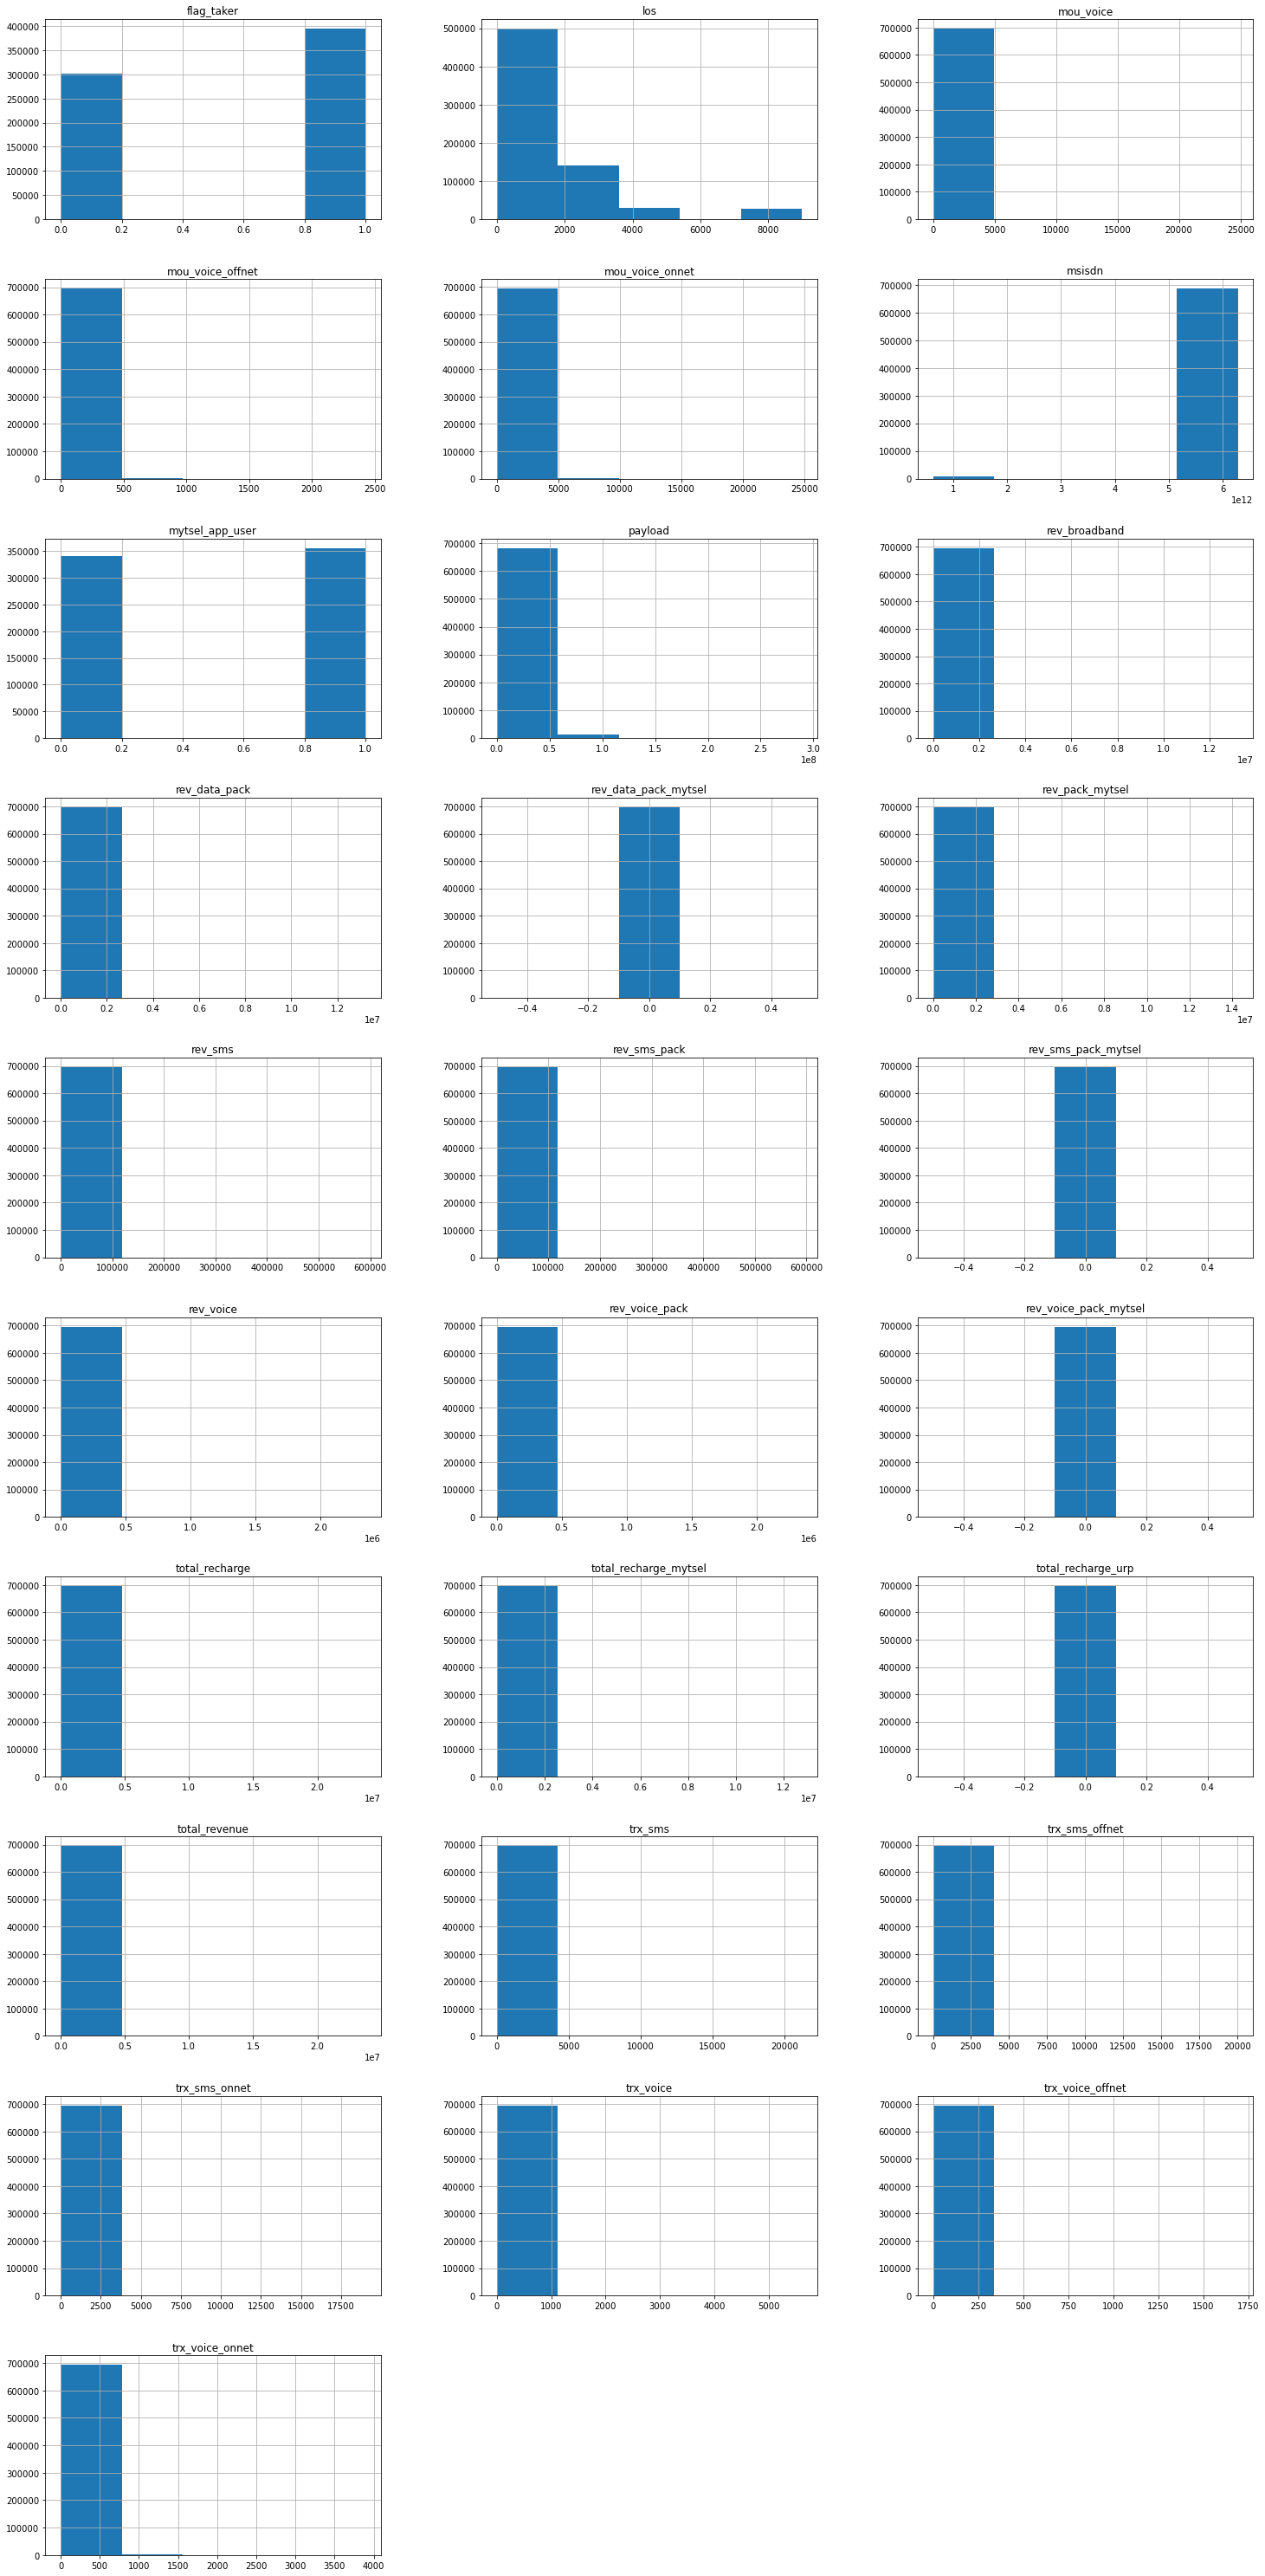

In [11]:
df_ojol.hist(bins=5, figsize=(25, 120), layout=(22, 3));

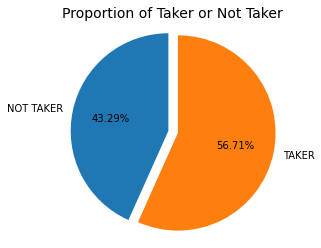

In [13]:
labels = 'NOT TAKER', 'TAKER'
sizes = [df_ojol.flag_taker[df_ojol['flag_taker']==0].count(), df_ojol.flag_taker[df_ojol['flag_taker']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Proportion of Taker or Not Taker", size=14)
plt.show()

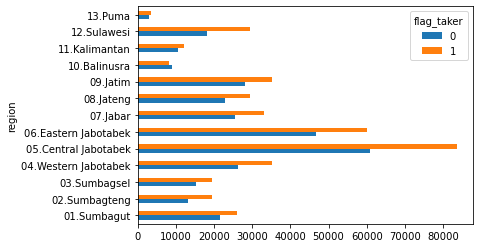

In [14]:
df_ojol.groupby('flag_taker').region.value_counts().unstack(0).plot.barh()

## Duplicate Data

In [15]:
df_ojol.duplicated().sum()

0

## Missing Values

In [16]:
missing_data_clean=pd.DataFrame({'total_missing':df_ojol.isnull().sum(), 
                                 '%missing':(df_ojol.isnull().sum())/(df_ojol.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,0.73
ojol,340026,48.88


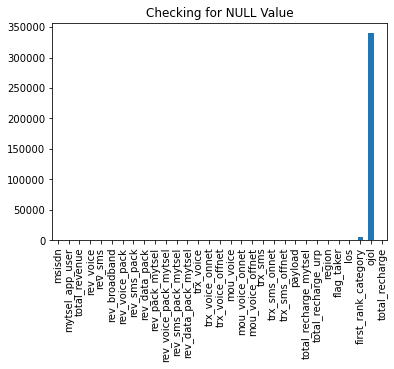

In [17]:
ojol_miss = df_ojol.isnull().sum().plot(kind='bar', title='Checking for NULL Value');

In [18]:
print("NULL: ", df_ojol['first_rank_category'].isnull().sum())
print("Not NULL: ", df_ojol['first_rank_category'].notnull().sum())

NULL:  5078
Not NULL:  690519


In [19]:
print("NULL: ", df_ojol['ojol'].isnull().sum())
print("Not NULL: ", df_ojol['ojol'].notnull().sum())

NULL:  340026
Not NULL:  355571


## Outliers

### Using the Interquartile Range (IQR)

In [20]:
numerical = df_ojol.select_dtypes(np.number).columns
range_col = ['los','total_revenue','total_recharge','rev_voice','rev_sms','rev_broadband','trx_voice','trx_voice_onnet','trx_voice_offnet','mou_voice','mou_voice_onnet','mou_voice_offnet','trx_sms','trx_sms_onnet','trx_sms_offnet','payload']

Q1 = df_ojol.loc[:,range_col].quantile(0.25)
Q3 = df_ojol.loc[:,range_col].quantile(0.75)
IQR=Q3-Q1
Lower_Bound=Q1-(1.5*IQR)
Upper_Bound=Q3+(1.5*IQR)

outlier=pd.DataFrame({'Q1':Q1,'Q3':Q3,'IQR':IQR,'Lower_Bound':Lower_Bound,'Upper_Bound':Upper_Bound})
pd.options.display.float_format = '{:.0f}'.format
outlier

# Anything outside of lower_bound and upper_bound is an outlier.

,Q1,Q3,IQR,Lower_Bound,Upper_Bound
los,567,1977,1410,-1548,4092
total_revenue,75460,160001,84541,-51352,286812
total_recharge,75000,160000,85000,-52500,287500
rev_voice,0,7467,7467,-11200,18668
rev_sms,0,825,825,-1238,2062
rev_broadband,75000,150000,75000,-37500,262500
trx_voice,19,135,116,-155,309
trx_voice_onnet,11,99,88,-121,231
trx_voice_offnet,2,28,26,-37,67
mou_voice,19,191,172,-239,449


### Number of Outliers

In [21]:
for col_name in numerical:
    q1 = df_ojol[col_name].quantile(0.25)
    q3 = df_ojol[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-(1.5*iqr)
    high = q1+(1.5*iqr)
    outliers1=(len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))
    outliers2=((len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))/len(df_ojol))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")

msisdn = 105523 (15.17 %)
mytsel_app_user = 0 (0.00 %)
total_revenue = 101402 (14.58 %)
rev_voice = 139850 (20.11 %)
rev_sms = 128426 (18.46 %)
rev_broadband = 83030 (11.94 %)
rev_voice_pack = 106021 (15.24 %)
rev_sms_pack = 2240 (0.32 %)
rev_data_pack = 76243 (10.96 %)
rev_pack_mytsel = 75485 (10.85 %)
rev_voice_pack_mytsel = 0 (0.00 %)
rev_sms_pack_mytsel = 0 (0.00 %)
rev_data_pack_mytsel = 0 (0.00 %)
trx_voice = 114058 (16.40 %)
trx_voice_onnet = 117866 (16.94 %)
trx_voice_offnet = 115970 (16.67 %)
mou_voice = 118329 (17.01 %)
mou_voice_onnet = 124684 (17.92 %)
mou_voice_offnet = 116365 (16.73 %)
trx_sms = 119116 (17.12 %)
trx_sms_onnet = 133550 (19.20 %)
trx_sms_offnet = 109752 (15.78 %)
payload = 91819 (13.20 %)
total_recharge_mytsel = 3484 (0.50 %)
total_recharge_urp = 0 (0.00 %)
flag_taker = 0 (0.00 %)
los = 109963 (15.81 %)
total_recharge = 100026 (14.38 %)


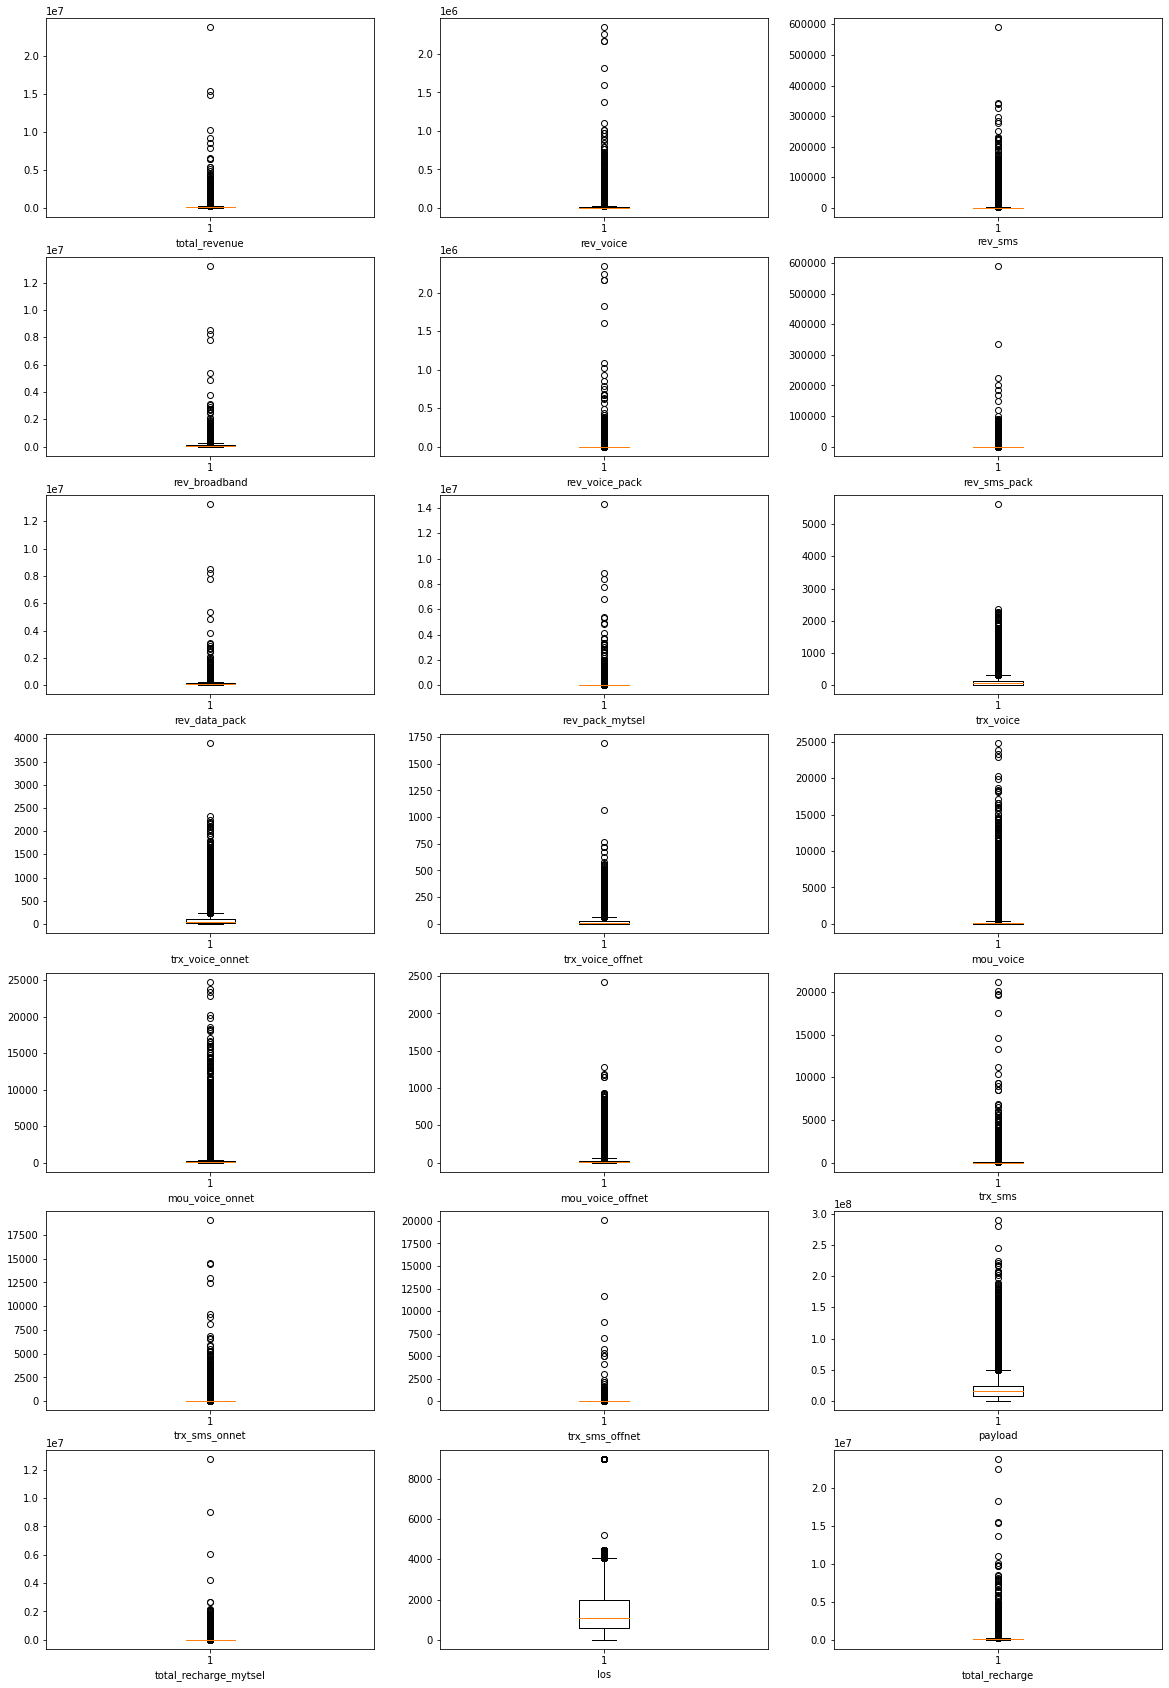

In [22]:
#Cek Outlier
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18),(ax19,ax20,ax21)) = plt.subplots(7, 3,figsize=(20, 30));

ax1.boxplot(df_ojol['total_revenue'])
ax1.set_xlabel('total_revenue')

ax2.boxplot(df_ojol['rev_voice'])
ax2.set_xlabel('rev_voice')

ax3.boxplot(df_ojol['rev_sms'])
ax3.set_xlabel('rev_sms')

ax4.boxplot(df_ojol['rev_broadband'])
ax4.set_xlabel('rev_broadband')

ax5.boxplot(df_ojol['rev_voice_pack'])
ax5.set_xlabel('rev_voice_pack')

ax6.boxplot(df_ojol['rev_sms_pack'])
ax6.set_xlabel('rev_sms_pack')

ax7.boxplot(df_ojol['rev_data_pack'])
ax7.set_xlabel('rev_data_pack')

ax8.boxplot(df_ojol['rev_pack_mytsel'])
ax8.set_xlabel('rev_pack_mytsel')

ax9.boxplot(df_ojol['trx_voice'])
ax9.set_xlabel('trx_voice')

ax10.boxplot(df_ojol['trx_voice_onnet'])
ax10.set_xlabel('trx_voice_onnet')

ax11.boxplot(df_ojol['trx_voice_offnet'])
ax11.set_xlabel('trx_voice_offnet')

ax12.boxplot(df_ojol['mou_voice'])
ax12.set_xlabel('mou_voice')

ax13.boxplot(df_ojol['mou_voice_onnet'])
ax13.set_xlabel('mou_voice_onnet')

ax14.boxplot(df_ojol['mou_voice_offnet'])
ax14.set_xlabel('mou_voice_offnet')

ax15.boxplot(df_ojol['trx_sms'])
ax15.set_xlabel('trx_sms')

ax16.boxplot(df_ojol['trx_sms_onnet'])
ax16.set_xlabel('trx_sms_onnet')

ax17.boxplot(df_ojol['trx_sms_offnet'])
ax17.set_xlabel('trx_sms_offnet')

ax18.boxplot(df_ojol['payload'])
ax18.set_xlabel('payload')

ax19.boxplot(df_ojol['total_recharge_mytsel'])
ax19.set_xlabel('total_recharge_mytsel')

ax20.boxplot(df_ojol['los'])
ax20.set_xlabel('los')

ax21.boxplot(df_ojol['total_recharge'])
ax21.set_xlabel('total_recharge')

plt.show()

# DATA PREPARATION

## Data Preprocessing & Cleaning

### Handling Missing Values

In [23]:
df_ojol['ojol'].value_counts()

Y    355571
Name: ojol, dtype: int64

In [24]:
df_ojol['ojol'] = df_ojol['ojol'].replace(np.NaN,0).replace('Y',1)
df_ojol.head(5)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,0,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,0,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,1,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,1,15000


In [25]:
df_ojol['ojol'].value_counts()

1    355571
0    340026
Name: ojol, dtype: int64

In [26]:
missing_data_clean=pd.DataFrame({'total_missing':df_ojol.isnull().sum(), '%missing':(df_ojol.isnull().sum())/(df_ojol.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,1


In [27]:
df_ojol['first_rank_category'] = df_ojol['first_rank_category'].replace(np.NaN,'undefined')
df_ojol['first_rank_category'].isnull().sum()

0

In [28]:
df_ojol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   msisdn                 695597 non-null  int64 
 1   mytsel_app_user        695597 non-null  int64 
 2   total_revenue          695597 non-null  int64 
 3   rev_voice              695597 non-null  int64 
 4   rev_sms                695597 non-null  int64 
 5   rev_broadband          695597 non-null  int64 
 6   rev_voice_pack         695597 non-null  int64 
 7   rev_sms_pack           695597 non-null  int64 
 8   rev_data_pack          695597 non-null  int64 
 9   rev_pack_mytsel        695597 non-null  int64 
 10  rev_voice_pack_mytsel  695597 non-null  int64 
 11  rev_sms_pack_mytsel    695597 non-null  int64 
 12  rev_data_pack_mytsel   695597 non-null  int64 
 13  trx_voice              695597 non-null  int64 
 14  trx_voice_onnet        695597 non-null  int64 
 15  

### Removing columns which contains only 0

In [29]:
df_ojol.loc[:, (df_ojol != 0).any(axis=0)].columns

Index(['msisdn', 'mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'region', 'flag_taker', 'los', 'first_rank_category', 'ojol',
       'total_recharge'],
      dtype='object')

In [30]:
#df_ojol = df_ojol.loc[:, (ojol_clean!=0).any(axis=0)]

NameError: name 'ojol_clean' is not defined

In [31]:
df_ojol.describe().T

,count,mean,std,min,25%,50%,75%,max
msisdn,695597,6213143252678,620748564893,628111563256,6281289284999,6281381932980,6282245001600,6285399999929
mytsel_app_user,695597,1,0,0,0,1,1,1
total_revenue,695597,128579,102930,3,75460,99196,160001,23756492
rev_voice,695597,9242,24155,0,0,0,7467,2348500
rev_sms,695597,1051,3918,0,0,165,825,591000
rev_broadband,695597,108742,79503,0,75000,78801,150000,13225000
rev_voice_pack,695597,3548,15946,0,0,0,0,2348500
rev_sms_pack,695597,28,1274,0,0,0,0,591000
rev_data_pack,695597,104255,77403,0,75000,75000,150000,13225000
rev_pack_mytsel,695597,12643,58688,0,0,0,0,14265600


In [32]:
print("{} rows x {} columns".format(df_ojol.shape[0], df_ojol.shape[1])) 

695597 rows x 31 columns


### Removing irrelevant features

In [33]:
df_ojol = df_ojol.drop(['msisdn'], axis = 1)

In [34]:
df_ojol.head(5)

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,1,10092,8132,800,0,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000
1,0,133657,131622,1410,0,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,0,135000
2,0,30006,28556,1450,0,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,0,30000
3,1,44503,7133,200,0,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,1,15000
4,1,5073,4473,600,0,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,1,15000


### Reshaping total_revenue to arpu_class

In [35]:
def segment_arpu(data):
    df_ojol['segment_arpu'] = "NaN"
    df_ojol.loc[(df_ojol['total_revenue'] >= 0) & (df_ojol['total_revenue'] <= 20000), 'segment_arpu'] = 'Very Low (<=20K)' 
    df_ojol.loc[(df_ojol['total_revenue'] > 20000) & (df_ojol['total_revenue'] <= 50000), 'segment_arpu'] = 'Medium (20-50K)'
    df_ojol.loc[(df_ojol['total_revenue'] > 50000) & (df_ojol['total_revenue'] <= 120000), 'segment_arpu'] = 'High (50-120K)'
    df_ojol.loc[(df_ojol['total_revenue'] > 120000) & (df_ojol['total_revenue'] <= 250000), 'segment_arpu'] = 'Very High (120-250K)' 
    df_ojol.loc[(df_ojol['total_revenue'] > 250000), 'segment_arpu'] = 'Top Usage (>250K)'  
    return df_ojol

df_ojol = segment_arpu(df_ojol)

In [36]:
df_ojol.segment_arpu.value_counts()

High (50-120K)          341851
Very High (120-250K)    235543
Top Usage (>250K)        53768
Medium (20-50K)          38787
Very Low (<=20K)         25648
Name: segment_arpu, dtype: int64

### Reshaping los to los_range

In [37]:
bins = [0, 30, 90, 180, 270, 360, 1080, np.inf]
names = ['<30d', '1-3mo', '3-6mo', '6-9mo', '9-12mo', '1-3y', '3y+']

df_ojol['los_range'] = pd.cut(df_ojol['los'], bins, labels=names)

In [38]:
df_ojol.los_range.value_counts()

3y+       348140
1-3y      262704
9-12mo     33260
6-9mo      23603
3-6mo      20233
1-3mo       7099
<30d         558
Name: los_range, dtype: int64

In [39]:
df_ojol.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,...,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge,segment_arpu,los_range
0,1,10092,8132,800,0,0,0,0,0,0,...,0,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000,Very Low (<=20K),3y+
1,0,133657,131622,1410,0,0,0,0,0,0,...,0,0,08.Jateng,0,1349,Transportation,0,135000,Very High (120-250K),3y+
2,0,30006,28556,1450,0,0,0,0,0,0,...,0,0,08.Jateng,0,775,Transportation,0,30000,Medium (20-50K),1-3y
3,1,44503,7133,200,0,0,0,0,0,0,...,0,0,09.Jatim,0,1485,Games,1,15000,Medium (20-50K),3y+
4,1,5073,4473,600,0,0,0,0,0,0,...,0,0,10.Balinusra,0,1130,Transportation,1,15000,Very Low (<=20K),3y+


### Handling Outliers

In [40]:
df_ojol_2 = df_ojol.copy()

In [41]:
print("List of columns with outliers:")
for col_name in range_col:
    q1 = df_ojol[col_name].quantile(0.25)
    q3 = df_ojol[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    outliers1=(len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))
    outliers2=((len(df_ojol.loc[((df_ojol[col_name] < low) | (df_ojol[col_name] > high)), col_name]))/len(df_ojol))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")
    #print("Lower bound: ",low)
    #print("Upper bound: ",high)

List of columns with outliers:
los = 37931 (5.45 %)
total_revenue = 35641 (5.12 %)
total_recharge = 38449 (5.53 %)
rev_voice = 99547 (14.31 %)
rev_sms = 80178 (11.53 %)
rev_broadband = 27579 (3.96 %)
trx_voice = 55038 (7.91 %)
trx_voice_onnet = 61592 (8.85 %)
trx_voice_offnet = 58419 (8.40 %)
mou_voice = 62830 (9.03 %)
mou_voice_onnet = 71405 (10.27 %)
mou_voice_offnet = 63384 (9.11 %)
trx_sms = 74523 (10.71 %)
trx_sms_onnet = 86133 (12.38 %)
trx_sms_offnet = 69638 (10.01 %)
payload = 25503 (3.67 %)


#### Replacing outliers with median values

In [42]:
for col_name in range_col:
    q1 = df_ojol_2[col_name].quantile(0.25)
    q3 = df_ojol_2[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-(1.5*iqr)
    high = q1+(1.5*iqr)
    median=float(df_ojol_2[col_name].median())
    df_ojol_2[col_name]=np.where(((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), median, df_ojol_2[col_name])
    df_ojol_2.loc[((df_ojol_2[col_name]<low)|(df_ojol_2[col_name]>high)),col_name] = np.nan
    df_ojol_2[col_name].fillna(median,inplace=True)
    outliers1=(len(df_ojol_2.loc[((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), col_name]))
    outliers2=((len(df_ojol_2.loc[((df_ojol_2[col_name] < low) | (df_ojol_2[col_name] > high)), col_name]))/len(df_ojol_2))*100
    print(col_name,"=","%d (%.2f" % (outliers1, outliers2),"%)")
    #print("Lower bound: ",low)
    #print("Upper bound: ",high)

los = 0 (0.00 %)
total_revenue = 0 (0.00 %)
total_recharge = 0 (0.00 %)
rev_voice = 0 (0.00 %)
rev_sms = 0 (0.00 %)
rev_broadband = 0 (0.00 %)
trx_voice = 0 (0.00 %)
trx_voice_onnet = 0 (0.00 %)
trx_voice_offnet = 0 (0.00 %)
mou_voice = 0 (0.00 %)
mou_voice_onnet = 0 (0.00 %)
mou_voice_offnet = 0 (0.00 %)
trx_sms = 0 (0.00 %)
trx_sms_onnet = 0 (0.00 %)
trx_sms_offnet = 0 (0.00 %)
payload = 0 (0.00 %)


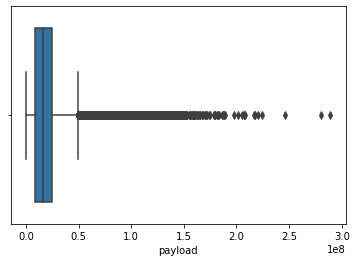

In [43]:
#Checking before-after handling outliers
sns.boxplot(df_ojol['payload'])

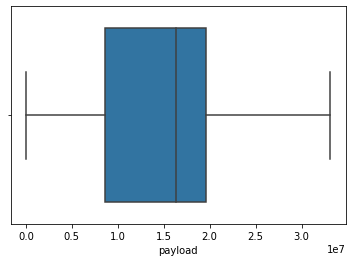

In [44]:
sns.boxplot(df_ojol_2['payload'])

In [45]:
df_ojol_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mytsel_app_user,695597,1,0,0,0,1,1,1
total_revenue,695597,100723,41933,3,75460,99196,127528,202271
rev_voice,695597,1056,2412,0,0,0,10,11200
rev_sms,695597,229,290,0,0,165,330,1230
rev_broadband,695597,87028,43701,0,75000,78801,106720,187500
rev_voice_pack,695597,3548,15946,0,0,0,0,2348500
rev_sms_pack,695597,28,1274,0,0,0,0,591000
rev_data_pack,695597,104255,77403,0,75000,75000,150000,13225000
rev_pack_mytsel,695597,12643,58688,0,0,0,0,14265600
rev_voice_pack_mytsel,695597,0,0,0,0,0,0,0


### Converting categorical to numerical data

In [46]:
df_ojol_2 = pd.get_dummies(df_ojol_2, drop_first=True)

In [47]:
df_ojol_2.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,...,segment_arpu_Medium (20-50K),segment_arpu_Top Usage (>250K),segment_arpu_Very High (120-250K),segment_arpu_Very Low (<=20K),los_range_1-3mo,los_range_3-6mo,los_range_6-9mo,los_range_9-12mo,los_range_1-3y,los_range_3y+
0,1,10092,8132,800,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,133657,0,165,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,30006,0,165,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,44503,7133,200,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,5073,4473,600,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Shifting dependent variable to the end

In [48]:
cols = list(df_ojol_2.columns.values)
cols.pop(cols.index('flag_taker'))
df_ojol_2 = df_ojol_2[cols+['flag_taker']]
df_ojol_2.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,...,segment_arpu_Top Usage (>250K),segment_arpu_Very High (120-250K),segment_arpu_Very Low (<=20K),los_range_1-3mo,los_range_3-6mo,los_range_6-9mo,los_range_9-12mo,los_range_1-3y,los_range_3y+,flag_taker
0,1,10092,8132,800,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,133657,0,165,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,30006,0,165,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,44503,7133,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5073,4473,600,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
df_ojol_2.columns

Index(['mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'rev_voice_pack_mytsel', 'rev_sms_pack_mytsel',
       'rev_data_pack_mytsel', 'trx_voice', 'trx_voice_onnet',
       'trx_voice_offnet', 'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet',
       'trx_sms', 'trx_sms_onnet', 'trx_sms_offnet', 'payload',
       'total_recharge_mytsel', 'total_recharge_urp', 'los', 'ojol',
       'total_recharge', 'region_02.Sumbagteng', 'region_03.Sumbagsel',
       'region_04.Western Jabotabek', 'region_05.Central Jabotabek',
       'region_06.Eastern Jabotabek', 'region_07.Jabar', 'region_08.Jateng',
       'region_09.Jatim', 'region_10.Balinusra', 'region_11.Kalimantan',
       'region_12.Sulawesi', 'region_13.Puma',
       'first_rank_category_Communications', 'first_rank_category_Education',
       'first_rank_category_FoodDrinks', 'first_rank_category_Games',
       'first_rank_cate

### EDA Part 2

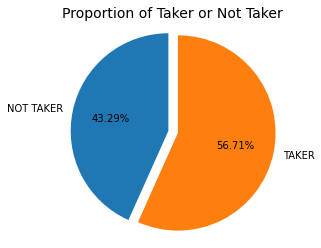

In [50]:
labels = 'NOT TAKER', 'TAKER'
sizes = [df_ojol_2.flag_taker[df_ojol_2['flag_taker']==0].count(), df_ojol_2.flag_taker[df_ojol_2['flag_taker']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Proportion of Taker or Not Taker", size=14)
plt.show()

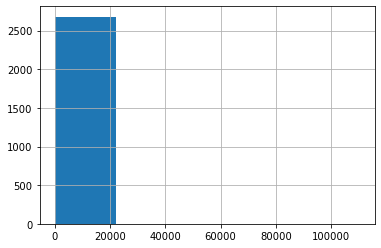

In [51]:
#ojol_clean['los'].value_counts().hist(bins=3);
df_ojol_2['los'].value_counts().hist(bins=5)

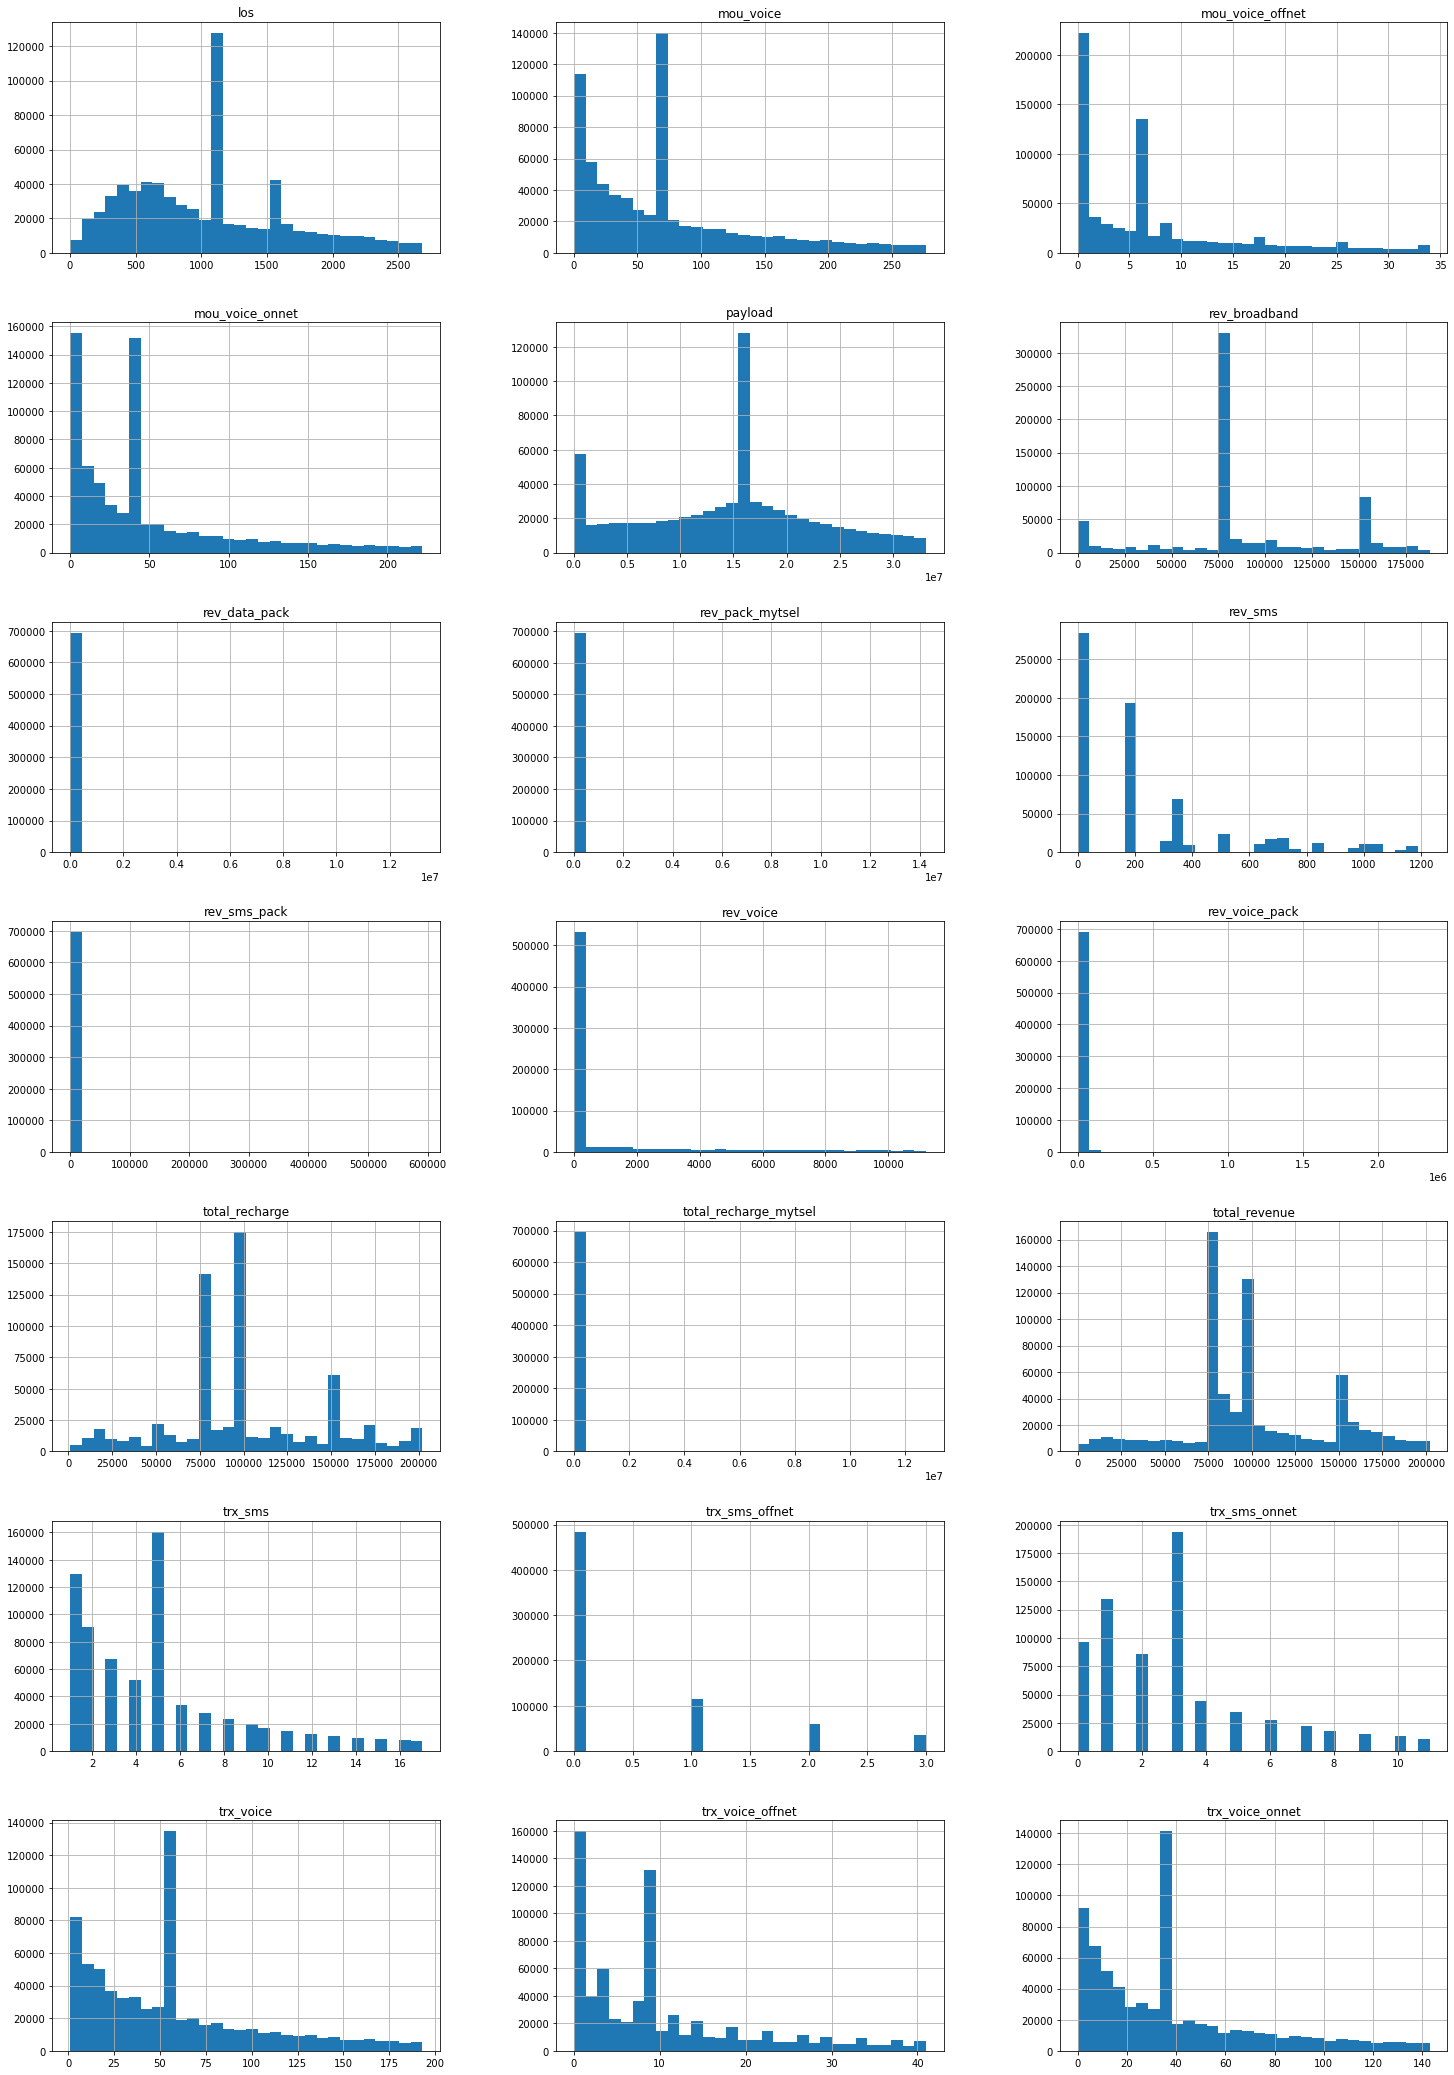

In [52]:
df_ojol_2.hist(column=['total_revenue','rev_voice','rev_sms','rev_broadband','rev_voice_pack','rev_sms_pack','rev_data_pack','rev_pack_mytsel','trx_voice', 'trx_voice_onnet','trx_voice_offnet','mou_voice','mou_voice_offnet','mou_voice_onnet','trx_sms','trx_sms_onnet','trx_sms_offnet','payload','total_recharge_mytsel','los','total_recharge'], bins=30, figsize=(25, 120), layout=(22, 3));


## Feature Engineering

In [53]:
#Ratio revenue per service (voice/sms/broadband) terhadap total revenue
df_ojol_2['rev_voice_ratio']=df_ojol_2['rev_voice']/df_ojol_2['total_revenue']
df_ojol_2['rev_voice_ratio']=df_ojol_2['rev_voice_ratio'].fillna(value=0)

df_ojol_2['rev_sms_ratio']=df_ojol_2['rev_sms']/df_ojol_2['total_revenue']
df_ojol_2['rev_sms_ratio']=df_ojol_2['rev_sms_ratio'].fillna(value=0)

df_ojol_2['rev_broadband_ratio']=df_ojol_2['rev_broadband']/df_ojol_2['total_revenue']
df_ojol_2['rev_broadband_ratio']=df_ojol_2['rev_broadband_ratio'].fillna(value=0)

In [54]:
#Ratio trx voice onnet atau offnet terhadap total trx voice secara menyeluruh
df_ojol_2['trx_voice_onnet_ratio']=df_ojol_2['trx_voice_onnet']/df_ojol_2['trx_voice']
df_ojol_2['trx_voice_onnet_ratio']=df_ojol_2['trx_voice_onnet_ratio'].fillna(value=0)

df_ojol_2['trx_voice_offnet_ratio']=df_ojol_2['trx_voice_offnet']/df_ojol_2['trx_voice']
df_ojol_2['trx_voice_offnet_ratio']=df_ojol_2['trx_voice_offnet_ratio'].fillna(value=0)

In [55]:
#Ratio trx sms onnet atau offnet terhadap total trx sms secara menyeluruh
df_ojol_2['trx_sms_onnet_ratio']=df_ojol_2['trx_sms_onnet']/df_ojol_2['trx_sms']
df_ojol_2['trx_sms_onnet_ratio']=df_ojol_2['trx_sms_onnet_ratio'].fillna(value=0)

df_ojol_2['trx_sms_offnet_ratio']=df_ojol_2['trx_sms_offnet']/df_ojol_2['trx_sms']
df_ojol_2['trx_sms_offnet_ratio']=df_ojol_2['trx_sms_offnet_ratio'].fillna(value=0)

In [56]:
df_ojol_2['mou_voice_onnet_ratio']=df_ojol_2['mou_voice_onnet']/df_ojol_2['mou_voice']
df_ojol_2['mou_voice_onnet_ratio']=df_ojol_2['mou_voice_onnet_ratio'].fillna(value=0)

df_ojol_2['mou_voice_offnet_ratio']=df_ojol_2['mou_voice_offnet']/df_ojol_2['mou_voice']
df_ojol_2['mou_voice_offnet_ratio']=df_ojol_2['mou_voice_offnet_ratio'].fillna(value=0)

In [57]:
df_ojol_2['recharge_revenue_ratio']=df_ojol_2['total_recharge']/df_ojol_2['total_revenue']
df_ojol_2['recharge_revenue_ratio']=df_ojol_2['recharge_revenue_ratio'].fillna(value=0)

In [58]:
df_ojol_2['average_rev_voice_per_trx']=(df_ojol_2['rev_voice'])/df_ojol_2['trx_voice']
df_ojol_2['average_rev_voice_per_trx']=df_ojol_2['average_rev_voice_per_trx'].fillna(value=0)

In [59]:
df_ojol_2['average_rev_sms_per_trx']=(df_ojol_2['rev_sms'])/df_ojol_2['trx_sms']
df_ojol_2['average_rev_sms_per_trx']=df_ojol_2['average_rev_sms_per_trx'].fillna(value=0)

In [60]:
df_ojol_2['average_rev_data_per_trx']=(df_ojol_2['rev_broadband'])/df_ojol_2['payload']
df_ojol_2['average_rev_data_per_trx']=df_ojol_2['average_rev_data_per_trx'].fillna(value=0)

In [61]:
df_ojol_2['average_mou_voice_per_trx']=(df_ojol_2['mou_voice'])/df_ojol_2['trx_voice']
df_ojol_2['average_mou_voice_per_trx']=df_ojol_2['average_mou_voice_per_trx'].fillna(value=0)

In [62]:
df_ojol_2.columns

Index(['mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'rev_voice_pack_mytsel', 'rev_sms_pack_mytsel',
       'rev_data_pack_mytsel', 'trx_voice', 'trx_voice_onnet',
       'trx_voice_offnet', 'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet',
       'trx_sms', 'trx_sms_onnet', 'trx_sms_offnet', 'payload',
       'total_recharge_mytsel', 'total_recharge_urp', 'los', 'ojol',
       'total_recharge', 'region_02.Sumbagteng', 'region_03.Sumbagsel',
       'region_04.Western Jabotabek', 'region_05.Central Jabotabek',
       'region_06.Eastern Jabotabek', 'region_07.Jabar', 'region_08.Jateng',
       'region_09.Jatim', 'region_10.Balinusra', 'region_11.Kalimantan',
       'region_12.Sulawesi', 'region_13.Puma',
       'first_rank_category_Communications', 'first_rank_category_Education',
       'first_rank_category_FoodDrinks', 'first_rank_category_Games',
       'first_rank_cate

In [63]:
df_ojol_2.head(5)

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,rev_voice_pack_mytsel,...,trx_voice_offnet_ratio,trx_sms_onnet_ratio,trx_sms_offnet_ratio,mou_voice_onnet_ratio,mou_voice_offnet_ratio,recharge_revenue_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx,average_rev_data_per_trx,average_mou_voice_per_trx
0,1,10092,8132,800,0,0,0,0,0,0,...,0,1,0,0,0,1,325,200,0,0
1,0,133657,0,165,0,0,0,0,0,0,...,0,1,0,1,0,1,0,24,0,1
2,0,30006,0,165,0,0,0,0,0,0,...,1,0,0,0,1,1,0,24,0,1
3,1,44503,7133,200,0,0,0,0,0,0,...,0,1,0,1,0,0,324,200,0,1
4,1,5073,4473,600,0,0,0,0,0,0,...,0,1,0,1,0,3,39,100,0,1


## Feature Selection

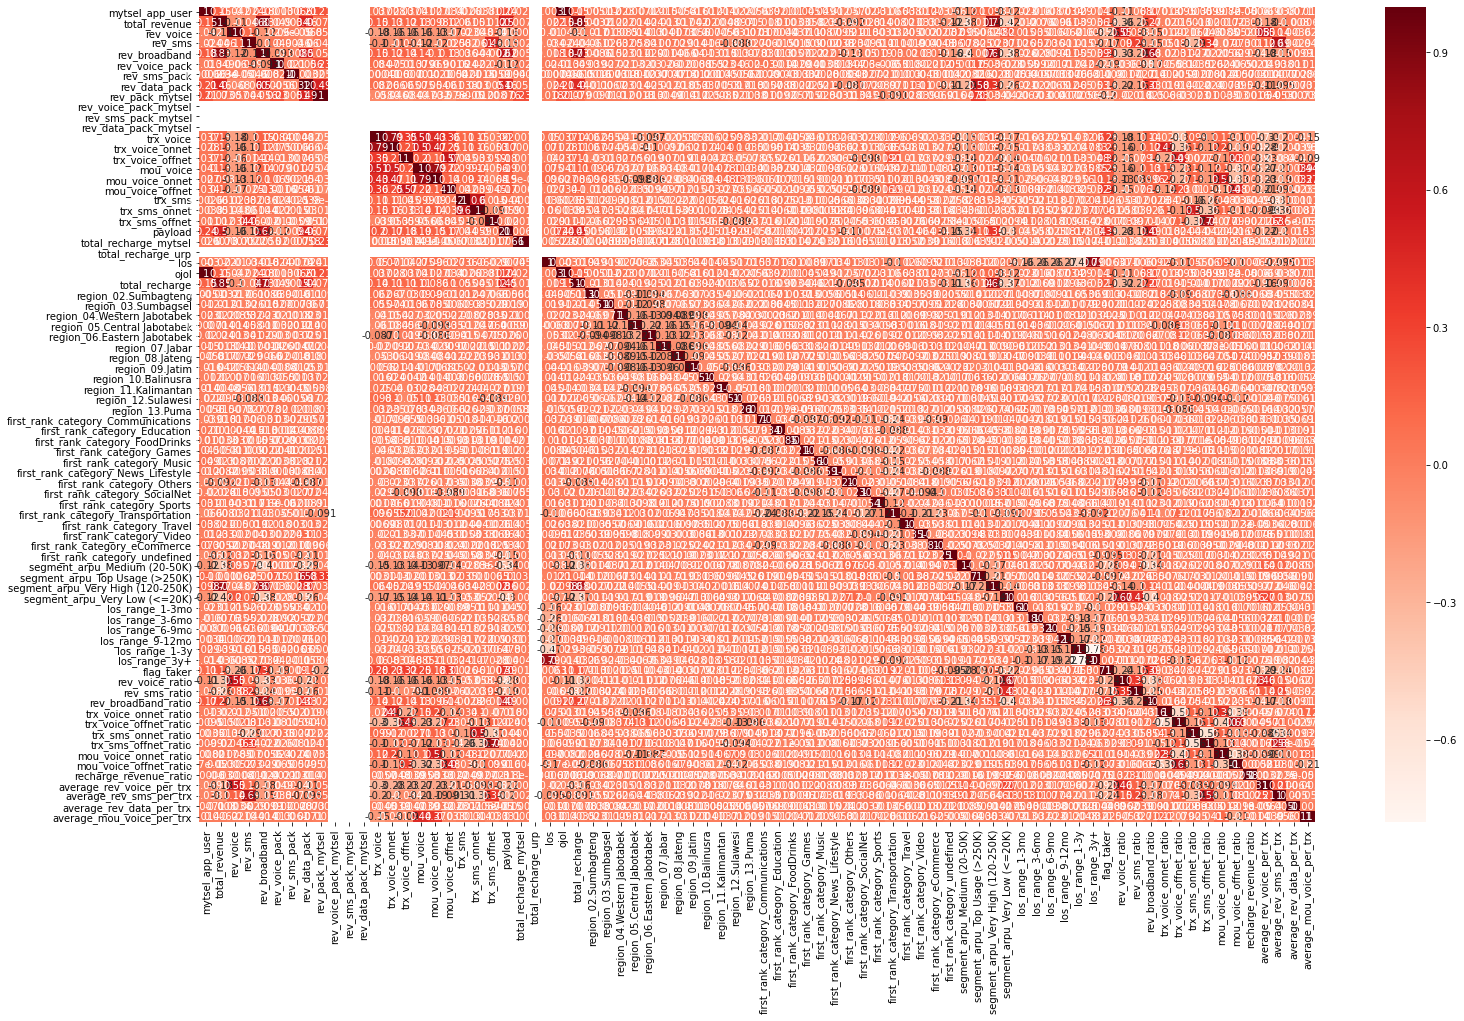

In [64]:
#FILTER METHOD
#Using Pearson Correlation
plt.figure(figsize=(25,15))
cor = df_ojol_2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [65]:
#Correlation with output variable
cor_target = abs(cor["flag_taker"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

mytsel_app_user                      0
total_revenue                        0
rev_voice                            0
rev_sms                              0
rev_broadband                        0
rev_voice_pack                       0
rev_data_pack                        0
rev_pack_mytsel                      0
trx_voice                            0
trx_voice_onnet                      0
trx_voice_offnet                     0
mou_voice                            0
mou_voice_onnet                      0
mou_voice_offnet                     0
payload                              0
ojol                                 0
total_recharge                       0
first_rank_category_Transportation   0
segment_arpu_Medium (20-50K)         0
segment_arpu_Very Low (<=20K)        0
flag_taker                           1
rev_voice_ratio                      0
rev_sms_ratio                        0
rev_broadband_ratio                  0
average_rev_voice_per_trx            0
average_rev_sms_per_trx  

In [66]:
columns=relevant_features.index 
columns.to_frame(index=False)

,0
0,mytsel_app_user
1,total_revenue
2,rev_voice
3,rev_sms
4,rev_broadband
5,rev_voice_pack
6,rev_data_pack
7,rev_pack_mytsel
8,trx_voice
9,trx_voice_onnet


In [67]:
df_ojol_3 = df_ojol_2[columns]

print("{} rows x {} columns".format(df_ojol_3.shape[0], df_ojol_3.shape[1])) 

695597 rows x 26 columns


In [68]:
df_ojol_3.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_data_pack,rev_pack_mytsel,trx_voice,trx_voice_onnet,...,total_recharge,first_rank_category_Transportation,segment_arpu_Medium (20-50K),segment_arpu_Very Low (<=20K),flag_taker,rev_voice_ratio,rev_sms_ratio,rev_broadband_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx
0,1,10092,8132,800,0,0,0,0,25,12,...,10000,1,0,1,0,1,0,0,325,200
1,0,133657,0,165,0,0,0,0,186,120,...,135000,1,0,0,0,0,0,0,0,24
2,0,30006,0,165,0,0,0,0,36,8,...,30000,1,1,0,0,0,0,0,0,24
3,1,44503,7133,200,0,0,0,0,22,15,...,15000,0,1,0,0,0,0,0,324,200
4,1,5073,4473,600,0,0,0,0,116,116,...,15000,1,0,1,0,1,0,0,39,100


In [ ]:
cols = list(df_ojol_2.columns.values)
cols.pop(cols.index('flag_taker'))
df_ojol_2 = df_ojol_2[cols+['flag_taker']]
df_ojol_2.head()

ojol_clean_6 = ojol_clean_5.join(y_kmeans_2)

y_kmeans_2.reset_index(drop=True, inplace=True)

ojol_clean_5 = ojol_clean_4[ojol_clean_4['flag_taker_3'] == 1 ]

## merging flag_taker with df_ojol_3

In [89]:
df_ojol_2_ft = df_ojol_2['flag_taker']

0         0
1         0
2         0
3         0
4         0
         ..
695592    1
695593    0
695594    1
695595    1
695596    1
Name: flag_taker, Length: 695597, dtype: int64

In [93]:
df_ojol_x = df_ojol_3.merge(df_ojol_2_ft, left_index=True, right_index=True)

In [95]:
df_ojol_x

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_data_pack,rev_pack_mytsel,trx_voice,trx_voice_onnet,trx_voice_offnet,mou_voice,mou_voice_onnet,mou_voice_offnet,payload,ojol,total_recharge,first_rank_category_Transportation,segment_arpu_Medium (20-50K),segment_arpu_Very Low (<=20K),flag_taker_x,rev_voice_ratio,rev_sms_ratio,rev_broadband_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx,flag_taker_y
0,1,10092,8132,800,0,0,0,0,25,12,12,6,2,3,9229653,1,10000,1,0,1,0,1,0,0,325,200,0
1,0,133657,0,165,0,0,0,0,186,120,9,102,63,6,3668863,0,135000,1,0,0,0,0,0,0,0,24,0
2,0,30006,0,165,0,0,0,0,36,8,28,21,4,16,2097283,0,30000,1,1,0,0,0,0,0,0,24,0
3,1,44503,7133,200,0,0,0,0,22,15,7,21,17,3,1974025,1,15000,0,1,0,0,0,0,0,324,200,0
4,1,5073,4473,600,0,0,0,0,116,116,0,147,147,0,10023262,1,15000,1,0,1,0,1,0,0,39,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695592,0,100205,281,350,96879,0,75000,0,55,36,23,69,43,14,15961205,0,100000,0,0,0,1,0,0,1,5,70,1
695593,0,85029,0,495,33084,0,33003,0,55,36,28,79,68,9,5589650,0,78000,1,0,0,0,0,0,0,0,165,0
695594,1,102341,0,495,99996,0,75000,0,168,125,38,69,43,6,28633254,1,100000,0,0,0,1,0,0,1,0,165,1
695595,1,75165,0,165,75000,0,75000,0,55,36,36,69,43,6,19442112,1,75000,0,0,0,1,0,0,1,0,82,1


# MODELING

## Split Data

In [102]:
from sklearn.model_selection import train_test_split
X = df_ojol_x.iloc[:, :26]
Y = df_ojol_x.iloc[:, 26:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## Feature Scaling

In [104]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [105]:
min_test_2 = X.min()
range_test_2 = (X - min_test_2).max()
X_scaled = (X - min_test_2)/range_test_2

In [106]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

## Cross Validation Multi Model

In [112]:
X_train_scaled_2 = X_train_scaled.iloc[:1001, :]
Y_train_2 = Y_train.iloc[:1001, :]
X_test_scaled_2 = X_test_scaled.iloc[:1001, :]
Y_test_2 = Y_test.iloc[:1001, :]
X_scaled_2 = X_scaled.iloc[:10001, :]
Y_2 = Y.iloc[:10001, :]
X_2 = X.iloc[:10001, :]

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [113]:
logr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=10)
dc_reg = DecisionTreeRegressor()
dc_clas = DecisionTreeClassifier()
random_fc = RandomForestClassifier(n_estimators = 10)
km = KMeans()
print(cross_val_score(logr, X_2, Y_2, cv=5, scoring='accuracy').mean())
print(cross_val_score(svc, X_2, Y_2, cv=5, scoring='accuracy').mean())
print(cross_val_score(gnb, X_2, Y_2, cv=5, scoring='accuracy').mean()) 
print(cross_val_score(knn, X_2, Y_2, cv=5, scoring='accuracy').mean()) 
print(cross_val_score(dc_reg, X_2, Y_2, cv=5, scoring='accuracy').mean())
print(cross_val_score(dc_clas, X_2, Y_2, cv=5, scoring='accuracy').mean()) 
print(cross_val_score(random_fc, X_2, Y_2, cv=5, scoring='accuracy').mean())  
print(cross_val_score(km, X_2, Y_2, cv=5, scoring='accuracy').mean())  

0.7564224887556221
0.6985300349825087
0.7669209395302348
0.7494233383308346
1.0
1.0
1.0
0.11709005497251375


## Modeling

In [114]:
from sklearn.ensemble import RandomForestClassifier
modelC = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=1)
modelC.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

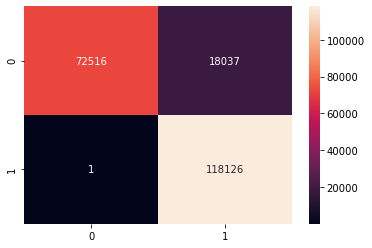

In [115]:
from sklearn.metrics import confusion_matrix
Y_predict = modelC.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [116]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     90553
           1       0.87      1.00      0.93    118127

    accuracy                           0.91    208680
   macro avg       0.93      0.90      0.91    208680
weighted avg       0.93      0.91      0.91    208680



## Model Interpretability

### SHAP Values

### Lime

# CLUSTERING